In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Bidirectional,Dropout
from tensorflow.keras.optimizers import Adam
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from nsepy import get_history as gh

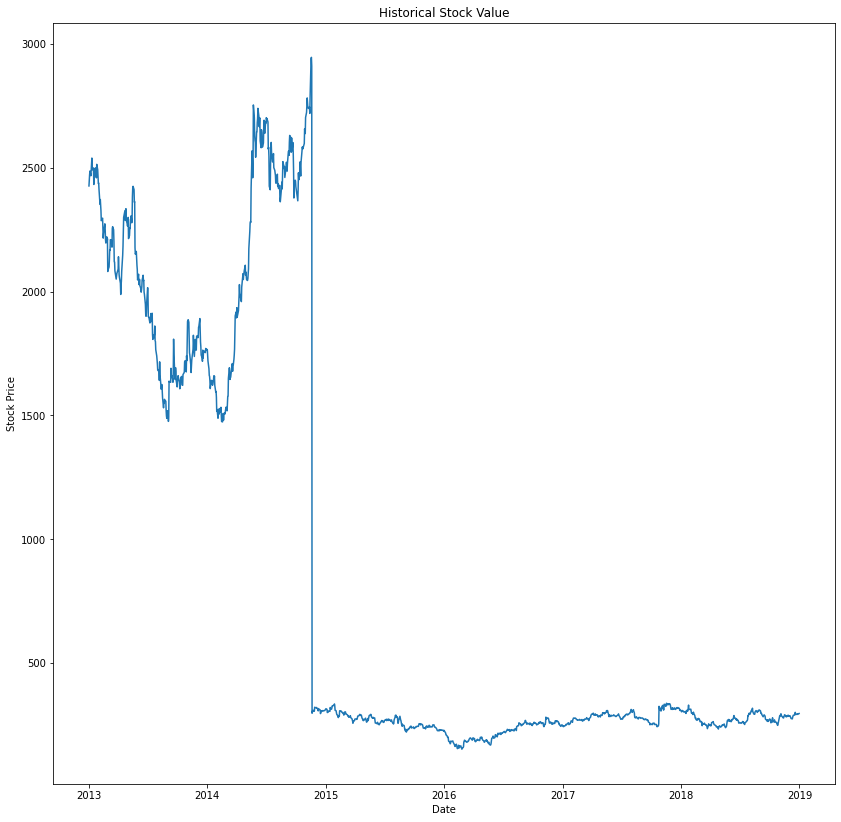

In [6]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2018,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [9]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
model=Sequential([LSTM(32,return_sequences=True,input_shape=(X_train.shape[1], 1)),
                  Dropout(0.2),
                  LSTM(32,return_sequences=True),
                  Dropout(0.2),
                  LSTM(32,return_sequences=True),
                  Dropout(0.2),
                 LSTM(32,return_sequences=True),
                  Dropout(0.2),
                  Dense(1)
                  ])

In [25]:
model.compile(optimizer=Adam(learning_rate = 0.001),loss='mean_',metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train,epochs=15,batch_size=32)

Epoch 1/15
